來自漢民科技 TCP傳輸 之 運禽車收檔資料(json) 6/15~6/17

In [1]:
import sys
sys.path.append('G:\我的雲端硬碟\python')
from polib.CsvEngn import *
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
path = r"G:\我的雲端硬碟\work\2021\1.農試所_大禽流感專案\1.資料\車軌資料、家禽健康證明書\漢名_運禽車資料\TCP\avianVehicles.json"
df = pd.read_json(path,lines=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   _id           386 non-null    object        
 1   date          386 non-null    datetime64[ns]
 2   licensePlate  386 non-null    object        
 3   createdAt     386 non-null    object        
 4   data          386 non-null    object        
 5   updatedAt     386 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 18.2+ KB
None


,_id,date,licensePlate,createdAt,data,updatedAt
0,{'$oid': '60c84d2a2a1a3449ce7c2717'},2021-06-15,KLC-5769,{'$date': '2021-06-15T14:48:10.663Z'},"[{'carStatus': 1, 'time': {'$date': '2021-06-1...",{'$date': '2021-06-15T23:57:15.458Z'}
1,{'$oid': '60c84d2a2a1a3449ce7c2718'},2021-06-15,111-M8,{'$date': '2021-06-15T14:48:10.663Z'},"[{'carStatus': 0, 'time': {'$date': '2021-06-1...",{'$date': '2021-06-15T23:57:07.377Z'}
2,{'$oid': '60c84d2a2a1a3449ce7c2719'},2021-06-15,AAK-802,{'$date': '2021-06-15T14:48:10.663Z'},"[{'carStatus': 0, 'time': {'$date': '2021-06-1...",{'$date': '2021-06-15T23:56:22.762Z'}
3,{'$oid': '60c84d2a2a1a3449ce7c271a'},2021-06-15,408-JF,{'$date': '2021-06-15T14:48:10.663Z'},"[{'carStatus': 1, 'time': {'$date': '2021-06-1...",{'$date': '2021-06-15T23:56:53.149Z'}
4,{'$oid': '60c84d2b2a1a3449ce7c2720'},2021-06-15,KEJ-7925,{'$date': '2021-06-15T14:48:11.645Z'},"[{'carStatus': 1, 'time': {'$date': '2021-06-1...",{'$date': '2021-06-15T23:57:55.038Z'}


In [3]:
# 檢查空值
df.isnull().sum()

_id             0
date            0
licensePlate    0
createdAt       0
data            0
updatedAt       0
dtype: int64

In [4]:
from datetime import datetime

def parse_data(raw_df):
    df_all = pd.DataFrame()
    for index, row in raw_df.iterrows():
        df = pd.DataFrame.from_dict(row["data"])
        df.loc[:,"licensePlate"] = row["licensePlate"]
        df.loc[:,"time"] = df.loc[:,"time"].apply(pares_time)
        df_all = pd.concat([df_all, df], ignore_index=True)
    
    # 轉換資料型別(可縮小容量)
    df_all = set_data_type(df_all)
    
    #依照車牌、時間排序
    df_all.sort_values(by=["licensePlate", "time"], inplace=True)
    return df_all.reset_index(drop=True)
    
def pares_time(dict_time):
    return datetime.strptime(dict_time.get("$date"), '%Y-%m-%dT%H:%M:%SZ')

def set_data_type(df_all):
    df_all.loc[:,"carStatus"] = df_all.loc[:,"carStatus"].astype(np.int32)
    df_all.loc[:,"lat"] = df_all.loc[:,"lat"].astype("float32")
    df_all.loc[:,"lon"] = df_all.loc[:,"lon"].astype("float32")
    df_all.loc[:,"speed"] = df_all.loc[:,"speed"].astype(np.int32)
    df_all.loc[:,"direction"] = df_all.loc[:,"direction"].astype(np.int32)
    df_all.loc[:,"licensePlate"] = df_all.loc[:,"licensePlate"].astype("category")
    return df_all
    
    

In [5]:
# parse data
df_parsed = parse_data(df)
print(df_parsed.info())
df_parsed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186483 entries, 0 to 186482
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   carStatus     186483 non-null  int32         
 1   time          186483 non-null  datetime64[ns]
 2   lat           186483 non-null  float32       
 3   lon           186483 non-null  float32       
 4   speed         186483 non-null  int32         
 5   direction     186483 non-null  int32         
 6   licensePlate  186483 non-null  category      
dtypes: category(1), datetime64[ns](1), float32(2), int32(3)
memory usage: 5.3 MB
None


,carStatus,time,lat,lon,speed,direction,licensePlate
0,0,2021-06-15 14:52:23,23.667849,120.480743,0,124,025-H9
1,0,2021-06-15 14:55:23,23.667814,120.480751,0,278,025-H9
2,0,2021-06-15 14:58:24,23.667828,120.480759,0,154,025-H9
3,0,2021-06-15 15:01:24,23.667765,120.480820,0,30,025-H9
4,0,2021-06-15 15:04:24,23.667828,120.480782,0,86,025-H9


In [6]:
# 檢查空值
df_parsed.isnull().sum()

carStatus       0
time            0
lat             0
lon             0
speed           0
direction       0
licensePlate    0
dtype: int64

In [7]:
# 數值基礎統計量
df_parsed.describe()

,carStatus,lat,lon,speed,direction
count,186483.000000,186483.000000,186483.000000,186483.000000,186483.000000
mean,0.475888,23.818810,120.537842,16.384024,161.310039
std,0.499420,0.634253,0.300969,32.298513,109.455500
min,0.000000,22.203440,120.126022,0.000000,0.000000
25%,0.000000,23.330165,120.394413,0.000000,60.000000
50%,0.000000,23.696507,120.531357,0.000000,166.000000
75%,1.000000,24.295528,120.798889,7.000000,250.000000
max,1.000000,25.217634,121.849922,139.000000,360.000000


<AxesSubplot:ylabel='Frequency'>

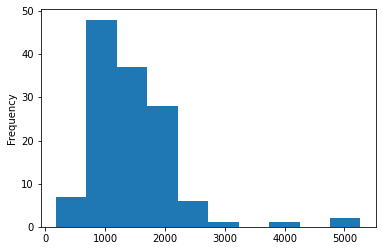

In [8]:
# 車牌資料數分布
df_parsed["licensePlate"].value_counts().plot.hist()

In [9]:
df_parsed.head()

,carStatus,time,lat,lon,speed,direction,licensePlate
0,0,2021-06-15 14:52:23,23.667849,120.480743,0,124,025-H9
1,0,2021-06-15 14:55:23,23.667814,120.480751,0,278,025-H9
2,0,2021-06-15 14:58:24,23.667828,120.480759,0,154,025-H9
3,0,2021-06-15 15:01:24,23.667765,120.480820,0,30,025-H9
4,0,2021-06-15 15:04:24,23.667828,120.480782,0,86,025-H9


In [10]:
# 數值基礎統計量(區分 carStatus)
for s in df_parsed["carStatus"].unique():
    print(f">> carStatus: {s}")
    print(df_parsed[df_parsed["carStatus"].isin([s])].describe())
    print(f"\n\n")

>> carStatus: 0
       carStatus           lat           lon         speed     direction
count    97738.0  97738.000000  97738.000000  97738.000000  97738.000000
mean         0.0     23.837616    120.590240      0.215249    151.779226
std          0.0      0.590090      0.245276      1.903349    113.160430
min          0.0     22.690920    120.169693      0.000000      0.000000
25%          0.0     23.451920    120.424843      0.000000     42.000000
50%          0.0     23.689295    120.535072      0.000000    152.000000
75%          0.0     24.509912    120.798935      0.000000    246.000000
max          0.0     25.105867    121.533676    105.000000    358.000000



>> carStatus: 1
       carStatus           lat           lon         speed     direction
count    88745.0  88745.000000  88745.000000  88745.000000  88745.000000
mean         1.0     23.798403    120.605881     34.191267    171.806660
std          0.0      0.678942      0.339081     39.788155    104.221218
min          1.0

In [113]:
# 輸出
formtoPkl(df_parsed, "運禽車_TCP_0615to0617")

 ==輸出備份pkl== ::: 運禽車_TCP_0615to0617_20210621_15.47.45.pkl
